# 1.패키지 가져옴

In [ ]:
# 한글 불러옴
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,108 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123576 files and dire

In [ ]:
# 런타임 다시 시작

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from google.colab import drive
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family='NanumGothic')

# 2.데이터 가져오기 및 확인 (df_caught)

In [ ]:
df_caught = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/0서울경찰별 단속신상정보.csv')
df_localcode = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/행정동법정동한글버전.csv')
df_police= pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/0df_police.csv')

In [ ]:
df_police.head()

In [ ]:
# 각 데이터프레임의 열 이름과 첫 번째 행의 값을 출력하는 함수
def print_column_names_and_first_row(dfs):
    for i, df in enumerate(dfs, 1):
        print(f"DataFrame {i}:")
        print("Columns:", df.columns.tolist())
        print("First Row:", df.iloc[0].tolist())
        print()

# dfs 지정
dfs=[df_caught,  df_localcode]

# 함수 호출
print_column_names_and_first_row(dfs)

#3.데이터 형태 변환

## 자치구별 데이터로 변환

(경찰서 데이터 이용)

In [ ]:
# Left Join 수행
df_caught = pd.merge(df_caught, df_police, on='관할경찰서', how='left')

# 결과 확인
print(df_caught)

       성별  적발횟수    나이   알콜농도                 측정일시     관할경찰서  연령대         측정일  \
0      남자     1  27.0  0.128  2022-01-01 00:04:00   서울마포경찰서  20대  2022-01-01   
1      남자     1  49.0  0.092  2022-01-01 00:22:00   서울송파경찰서  40대  2022-01-01   
2      남자     1  28.0  0.152  2022-01-01 01:20:00   서울성동경찰서  20대  2022-01-01   
3      남자     1  37.0  0.085  2022-01-01 01:30:00   서울마포경찰서  30대  2022-01-01   
4      남자     1  34.0  0.078  2022-01-01 01:39:00   서울용산경찰서  30대  2022-01-01   
...    ..   ...   ...    ...                  ...       ...  ...         ...   
15506  남자     1  63.0  0.059  2022-12-31 18:07:00   서울강동경찰서  60대  2022-12-31   
15507  남자     1  62.0  0.183  2022-12-31 19:26:00   서울강서경찰서  60대  2022-12-31   
15508  남자     1  60.0  0.078  2022-12-31 20:52:00  서울영등포경찰서  50대  2022-12-31   
15509  남자     1  41.0  0.139  2022-12-31 21:16:00   서울마포경찰서  40대  2022-12-31   
15510  남자     2  62.0  0.159  2022-12-31 22:11:00   서울용산경찰서  60대  2022-12-31   

       측정월      측정요일  측정시간  count   자치구

In [ ]:
#  열 지우기
df_caught.drop(columns=['count'], inplace=True)

## 적발횟수 1로 설정

In [ ]:
# 적발 횟수를 모두 1로 설정
df_caught['적발횟수'] = 1

## 시간대 범주로 분류

In [ ]:
# 시간대를 범주로 분류
def time_category(hour):
    if 0 <= hour < 4:
        return 'Late Night'
    elif 4 <= hour < 8:
        return 'Early Morning'
    elif 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    elif 20 <= hour < 24:
        return 'Night'

df_caught['시간대'] = df_caught['측정시간'].apply(time_category)

## 필요한 열만 남기기 (df_caught)

In [ ]:
df_caught = df_caught[['자치구','성별','알콜농도','연령대','측정일','측정월','측정요일','측정시간','시간대','적발횟수']]

In [ ]:
df_caught.head()

,자치구,성별,알콜농도,연령대,측정일,측정월,측정요일,측정시간,시간대,적발횟수
0,마포구,남자,0.128,20대,2022-01-01,1,Saturday,0,Late Night,1
1,송파구,남자,0.092,40대,2022-01-01,1,Saturday,0,Late Night,1
2,성동구,남자,0.152,20대,2022-01-01,1,Saturday,1,Late Night,1
3,마포구,남자,0.085,30대,2022-01-01,1,Saturday,1,Late Night,1
4,용산구,남자,0.078,30대,2022-01-01,1,Saturday,1,Late Night,1


## 분석할 수 있는 데이터 형태로 변환 (caught_proc)

In [ ]:
# 이미 로드된 df_caught 데이터 사용
# 성별, 요일, 월, 연령대, 시간대별 적발 횟수 집계
pivot_gender = df_caught.pivot_table(index='자치구', columns='성별', values='적발횟수', aggfunc='sum', fill_value=0)
pivot_weekday = df_caught.pivot_table(index='자치구', columns='측정요일', values='적발횟수', aggfunc='sum', fill_value=0)
pivot_month = df_caught.pivot_table(index='자치구', columns='측정월', values='적발횟수', aggfunc='sum', fill_value=0)
pivot_month.columns = [f"{col}월" for col in pivot_month.columns]  # 월별 값에 접두사 추가
pivot_age = df_caught.pivot_table(index='자치구', columns='연령대', values='적발횟수', aggfunc='sum', fill_value=0)
pivot_hour = df_caught.pivot_table(index='자치구', columns='시간대', values='적발횟수', aggfunc='sum', fill_value=0)

# 평균 알콜농도 및 총 적발 횟수 집계
agg_data = df_caught.groupby('자치구').agg({'알콜농도': 'mean', '적발횟수': 'sum'}).rename(columns={'알콜농도': '평균알콜농도', '적발횟수': '총적발횟수'})

# 피벗 테이블을 결합하여 최종 데이터셋 생성
caught_proc = pivot_gender.join([pivot_weekday, pivot_month, pivot_age, pivot_hour, agg_data])

# 열 이름 정리
caught_proc.columns = [f"{col}" for col in caught_proc.columns]

In [ ]:
caught_proc.columns

Index(['남자', '여자', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월',
       '9월', '10월', '11월', '12월', '10대', '20대', '30대', '40대', '50대', '60대',
       '70대', '80대 이상', 'Afternoon', 'Early Morning', 'Evening', 'Late Night',
       'Morning', 'Night', '평균알콜농도', '총적발횟수'],
      dtype='object')

In [ ]:
# 결과 출력
print(caught_proc.head())

       남자   여자  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  \
자치구                                                                   
강남구  1693  305     308     199       383     267       280      272   
강동구   469   55      79      65       103      69        70       61   
강북구   505   40      77      66        95     106        71       62   
강서구   819   74     142      97       160     134       145       96   
관악구   652   51     104      80       127     118        98       83   

     Wednesday   1월  ...  70대  80대 이상  Afternoon  Early Morning  Evening  \
자치구                  ...                                                   
강남구        289  139  ...    4       0         66            292       87   
강동구         77   40  ...    5       0         22             63       40   
강북구         68   34  ...    4       1         18             53       17   
강서구        119   58  ...    8       1         27            133       57   
관악구         93   54  ...    9       0         

# 4.스케일링

## StandardScaler (scaled1) (안함)

In [ ]:
# Standard Scaler 생성
scaler = StandardScaler()


# 스케일링 수행
scaled_data = scaler.fit_transform(caught_proc)

# 스케일링된 데이터를 데이터프레임으로 변환
scaled1 = pd.DataFrame(scaled_data, index=caught_proc.index, columns=caught_proc.columns)

# 결과 확인
print(scaled1.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


           남자        여자    Friday    Monday  Saturday    Sunday  Thursday  \
자치구                                                                         
강남구  3.607149  4.289702  3.693790  3.438992  4.080498  3.304615  3.436311   
강동구 -0.269326 -0.204956 -0.233949 -0.066980 -0.120015 -0.533453 -0.388288   
강북구 -0.155312 -0.474636 -0.268253 -0.040816 -0.240029  0.183762 -0.370075   
강서구  0.839143  0.136638  0.846608  0.770267  0.735090  0.726519  0.977640   
관악구  0.310245 -0.276871  0.194843  0.325480  0.240029  0.416372  0.121659   

      Tuesday  Wednesday        1월  ...       70대    80대 이상  Afternoon  \
자치구                                 ...                                  
강남구  3.810607   3.831144  3.666356  ...  0.072619 -0.632456   3.910879   
강동구 -0.285776  -0.163557 -0.081777  ...  0.526490 -0.632456   0.233984   
강북구 -0.266362  -0.333143 -0.308937  ...  0.072619  0.948683  -0.100279   
강서구  0.393719   0.627846  0.599701  ...  1.888102  0.948683   0.651813   
관악구  0.141335   

## 총적발횟수로 표준화(scaled2)

In [ ]:
# caught_proc 데이터프레임 복사
scaled2 = caught_proc.copy()

In [ ]:
# 총적발횟수로 나누어 스케일링
for column in scaled2.columns:
    if column not in ['평균알콜농도', '총적발횟수']:
        scaled2[column] = scaled2[column] / scaled2['총적발횟수']

# 총적발횟수를 1로 설정
scaled2['총적발횟수'] = 1

# 결과 확인
scaled2.head(1)


,남자,여자,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1월,...,Evening,Late Night,Morning,Night,평균알콜농도,총적발횟수,요일별클러스터,월별클러스터,연령별클러스터,시간별클러스터
자치구,,,,,,,,,,,,,,,,,,,,,
강남구,0.847347,0.152653,0.154154,0.0996,0.191692,0.133634,0.14014,0.136136,0.144645,0.06957,...,0.043544,0.384885,0.060561,0.331832,0.126381,1,0.001001,0.001001,0.001001,0.001001


In [ ]:
# 파일 저장
scaled2.to_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/도연_data/조건별사고비율.csv')

# 5.각 유형별 클러스터링

'남자', '여자'

'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'

'1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'

'10대', '20대', '30대', '40대', '50대', '60대',   '70대', '80대 이상'

'Afternoon', 'Early Morning',   'Evening', 'Late Night', 'Morning', 'Night'

##2.요일별(4개)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



요일별클러스터 0:
['은평구', '강서구', '영등포구', '송파구', '성북구', '성동구', '서초구', '중구']

요일별클러스터 1:
['강남구', '종로구', '양천구', '서대문구', '중랑구', '동대문구', '구로구', '강동구', '동작구']

요일별클러스터 2:
['노원구', '금천구', '광진구', '관악구', '용산구', '강북구', '마포구']

요일별클러스터 3:
['도봉구']

           Monday   Tuesday  Wednesday  Thursday    Friday  Saturday    Sunday
요일별클러스터                                                                       
0        0.106346  0.125441   0.138076  0.163523  0.156903  0.159607  0.150103
1        0.114425  0.119891   0.145601  0.141296  0.142323  0.193168  0.143296
2        0.106956  0.116759   0.128928  0.135965  0.143729  0.190500  0.177163
3        0.105882  0.070588   0.109804  0.145098  0.160784  0.180392  0.227451


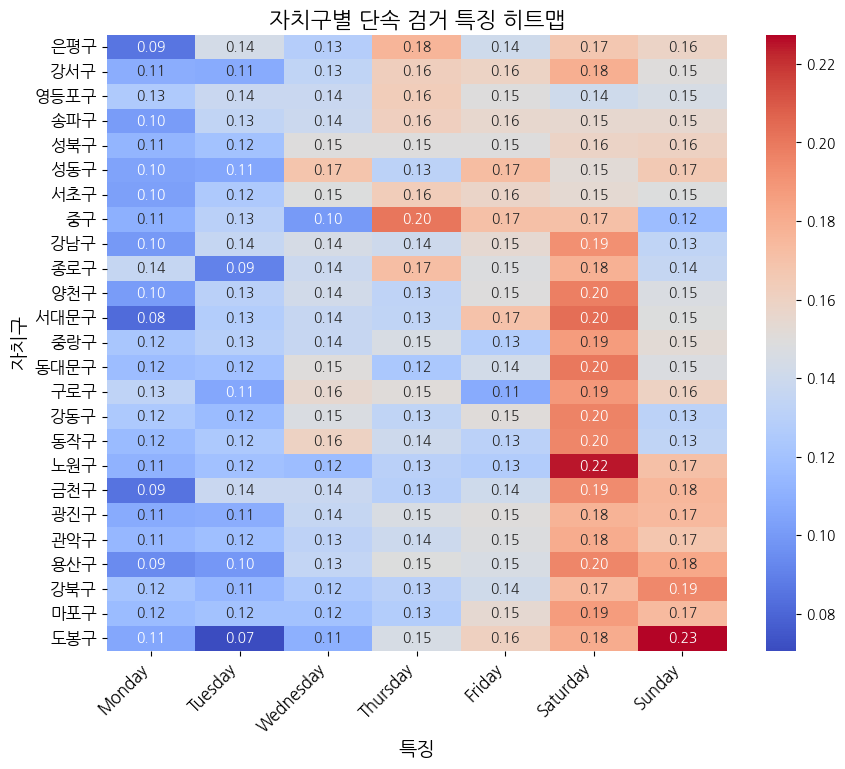

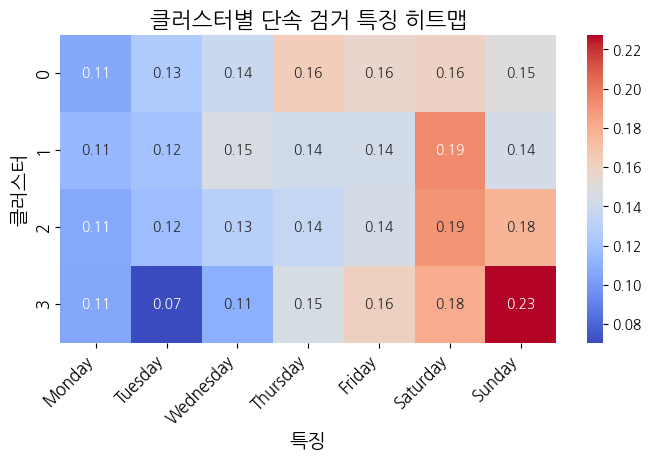

In [ ]:
# 클러스터 변수 설정
columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']
cluster_name='요일별클러스터'

# K-means 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled2[columns])

# 클러스터 결과를 데이터프레임에 추가
scaled2[cluster_name] = clusters

# 클러스터 번호로 정렬
caught_proc_sorted = scaled2.sort_values(by=cluster_name)

# 출력코드
# 각 클러스터에 포함된 자치구 출력
for cluster in sorted(caught_proc_sorted[cluster_name].unique()):
    print()
    print(f"{cluster_name} {cluster}:")
    print(caught_proc_sorted[caught_proc_sorted[cluster_name] == cluster].index.tolist())


# 각 클러스터의 값들의 평균 계산
cluster_means = scaled2.groupby(cluster_name).mean()

# 출력코드
# 각 클러스터 평균 계산 출력
print()
print(cluster_means[columns])

# 히트맵 시각화에 포함할 컬럼 설정
caught_proc_for_heatmap = caught_proc_sorted[columns]

# 히트맵 시각화
# 자치구 전체
plt.figure(figsize=(10, 8))
sns.heatmap(caught_proc_for_heatmap, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('자치구별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('자치구', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 히트맵 시각화
# 클러스터별
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_means[columns], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('클러스터별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('클러스터', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()



In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from scipy.stats import f_oneway


Silhouette Score: 0.35333136639934926

실루엣 계수는 -1에서 1 사이의 값을 가지며, 1에 가까울수록 클러스터가 잘 분리되었음을 의미합니다.
0.35는 중간 정도의 클러스터링 품질을 나타냅니다. 이는 클러스터가 완벽하게 분리되지 않았고, 일부 데이터 포인트가 인접 클러스터와 겹칠 가능성이 있음을 시사합니다.
Davies-Bouldin Index: 0.9317581479858519

Davies-Bouldin Index는 값이 낮을수록 클러스터가 잘 분리된 것을 의미합니다.
0.93은 비교적 낮은 값으로, 클러스터가 적절히 분리된 상태임을 나타냅니다. 그러나 개선의 여지가 있을 수 있습니다.
Calinski-Harabasz Index: 17.01451701519484

Calinski-Harabasz Index는 값이 높을수록 클러스터가 잘 분리된 것을 의미합니다.
17.01은 특정 기준과 비교할 때 클러스터링이 적절하게 수행되었음을 시사하지만, 이 값만으로는 절대적인 품질을 판단하기 어렵습니다. 다른 데이터셋이나 클러스터링 방법과 비교해야 합니다.


### 오토인코더 사용

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

# 데이터 준비 (scaled2에서 요일 데이터만 사용)
data = scaled2[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# 오토인코더 모델 정의
input_dim = data.shape[1]
encoding_dim = 5  # 잠재 공간의 차원

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 오토인코더 학습
autoencoder.fit(data, data, epochs=50, batch_size=256, shuffle=True)

# 데이터 변환
encoded_data = encoder.predict(data)

# K-means 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(encoded_data)

# 클러스터 결과를 데이터프레임에 추가
scaled2['Autoencoder_클러스터'] = clusters

# 각 클러스터에 포함된 자치구 확인
for cluster in sorted(scaled2['Autoencoder_클러스터'].unique()):
    print()
    print(f"Autoencoder 클러스터 {cluster}:")
    print(scaled2[scaled2['Autoencoder_클러스터'] == cluster].index.tolist())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/50
1/1 [==============================] - 1s 871ms/step - loss: 0.6931
Epoch 2/50
1/1 [==============================] - 0s 13ms/step - loss: 0.6928
Epoch 3/50
1/1 [==============================] - 0s 15ms/step - loss: 0.6924
Epoch 4/50
1/1 [==============================] - 0s 18ms/step - loss: 0.6921
Epoch 5/50
1/1 [==============================] - 0s 15ms/step - loss: 0.6917
Epoch 6/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6914
Epoch 7/50
1/1 [==============================] - 0s 13ms/step - loss: 0.6910
Epoch 8/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6907
Epoch 9/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6903
Epoch 10/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6899
Epoch 11/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6896
Epoch 12/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6892
Epoch 13/50
1/1 [==============================] - 0s 17ms/s

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


###t-SNE

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


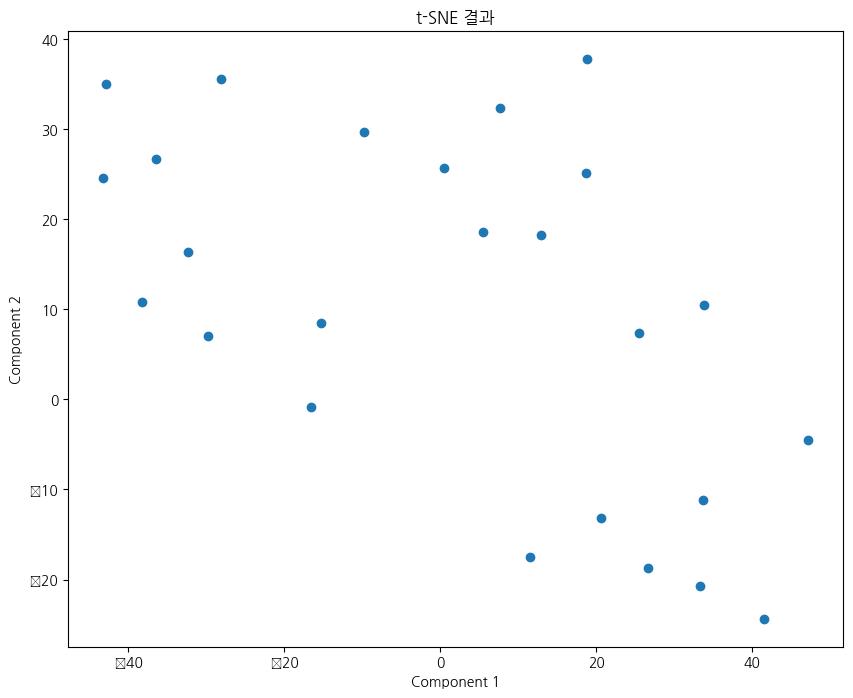


tSNE 클러스터 0:
['강동구', '구로구', '동대문구', '동작구', '중랑구']

tSNE 클러스터 1:
['강서구', '서초구', '성동구', '성북구', '송파구', '영등포구', '은평구', '종로구', '중구']

tSNE 클러스터 2:
['강북구', '관악구', '광진구', '노원구', '도봉구', '마포구', '용산구']

tSNE 클러스터 3:
['강남구', '금천구', '서대문구', '양천구']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# t-SNE 적용
perplexity_value = min(5, data.shape[0] - 1)  # 데이터 샘플 수보다 작은 perplexity 설정
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
tsne_result = tsne.fit_transform(data)

# 시각화
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('t-SNE 결과')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# K-means 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(tsne_result)

# 클러스터 결과를 데이터프레임에 추가
scaled2['tSNE_클러스터'] = clusters

# 각 클러스터에 포함된 자치구 확인
for cluster in sorted(scaled2['tSNE_클러스터'].unique()):
    print()
    print(f"tSNE 클러스터 {cluster}:")
    print(scaled2[scaled2['tSNE_클러스터'] == cluster].index.tolist())


###DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# 데이터 준비 (scaled2에서 요일 데이터만 사용)
data = scaled2[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# DBSCAN 적용
eps_value = 0.03  # 예시로 eps 값을 작게 설정
min_samples_value = 2  # 예시로 최소 샘플 수를 작게 설정
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(data)

# 클러스터 결과를 데이터프레임에 추가
scaled2['DBSCAN_클러스터'] = clusters

# 각 클러스터에 포함된 자치구 확인
for cluster in sorted(scaled2['DBSCAN_클러스터'].unique()):
    print()
    print(f"DBSCAN 클러스터 {cluster}:")
    print(scaled2[scaled2['DBSCAN_클러스터'] == cluster].index.tolist())



DBSCAN 클러스터 -1:
['강서구', '구로구', '금천구', '노원구', '도봉구', '성동구', '영등포구', '은평구', '종로구', '중구', '중랑구']

DBSCAN 클러스터 0:
['강남구', '강동구', '동대문구', '동작구', '서대문구', '양천구']

DBSCAN 클러스터 1:
['강북구', '관악구', '광진구', '마포구', '용산구']

DBSCAN 클러스터 2:
['서초구', '성북구', '송파구']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###GMM

In [ ]:
from sklearn.mixture import GaussianMixture

# GMM 적용
gmm = GaussianMixture(n_components=4, random_state=42)
clusters = gmm.fit_predict(data)

# 클러스터 결과를 데이터프레임에 추가
scaled2['GMM_클러스터'] = clusters

# 각 클러스터에 포함된 자치구 확인
for cluster in sorted(scaled2['GMM_클러스터'].unique()):
    print()
    print(f"GMM 클러스터 {cluster}:")
    print(scaled2[scaled2['GMM_클러스터'] == cluster].index.tolist())



GMM 클러스터 0:
['구로구', '종로구']

GMM 클러스터 1:
['강북구', '관악구', '광진구', '금천구', '도봉구', '마포구', '성동구', '용산구']

GMM 클러스터 2:
['강서구', '서초구', '성북구', '송파구', '영등포구', '은평구', '중구']

GMM 클러스터 3:
['강남구', '강동구', '노원구', '동대문구', '동작구', '서대문구', '양천구', '중랑구']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 연관분석

In [ ]:
# K-means 클러스터링 결과 확인
print("KMeans 클러스터:")
for cluster in sorted(scaled2['요일별클러스터'].unique()):
    print(f"클러스터 {cluster}: {scaled2[scaled2['요일별클러스터'] == cluster].index.tolist()}")

print()
# Autoencoder 클러스터링 결과 확인
print("\nAutoencoder 클러스터:")
for cluster in sorted(scaled2['Autoencoder_클러스터'].unique()):
    print(f"클러스터 {cluster}: {scaled2[scaled2['Autoencoder_클러스터'] == cluster].index.tolist()}")

print()
# t-SNE 클러스터링 결과 확인
print("\ntSNE 클러스터:")
for cluster in sorted(scaled2['tSNE_클러스터'].unique()):
    print(f"클러스터 {cluster}: {scaled2[scaled2['tSNE_클러스터'] == cluster].index.tolist()}")

print()
# DBSCAN 클러스터링 결과 확인
print("\nDBSCAN 클러스터:")
for cluster in sorted(scaled2['DBSCAN_클러스터'].unique()):
    print(f"클러스터 {cluster}: {scaled2[scaled2['DBSCAN_클러스터'] == cluster].index.tolist()}")

print()
# GMM 클러스터링 결과 확인
print("\nGMM 클러스터:")
for cluster in sorted(scaled2['GMM_클러스터'].unique()):
    print(f"클러스터 {cluster}: {scaled2[scaled2['GMM_클러스터'] == cluster].index.tolist()}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KMeans 클러스터:
클러스터 0: ['강서구', '서초구', '성동구', '성북구', '송파구', '영등포구', '은평구', '중구']
클러스터 1: ['강남구', '강동구', '구로구', '동대문구', '동작구', '서대문구', '양천구', '종로구', '중랑구']
클러스터 2: ['강북구', '관악구', '광진구', '금천구', '노원구', '마포구', '용산구']
클러스터 3: ['도봉구']


Autoencoder 클러스터:
클러스터 0: ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


tSNE 클러스터:
클러스터 0: ['강동구', '구로구', '동대문구', '동작구', '중랑구']
클러스터 1: ['강서구', '서초구', '성동구', '성북구', '송파구', '영등포구', '은평구', '종로구', '중구']
클러스터 2: ['강북구', '관악구', '광진구', '노원구', '도봉구', '마포구', '용산구']
클러스터 3: ['강남구', '금천구', '서대문구', '양천구']


DBSCAN 클러스터:
클러스터 -1: ['강서구', '구로구', '금천구', '노원구', '도봉구', '성동구', '영등포구', '은평구', '종로구', '중구', '중랑구']
클러스터 0: ['강남구', '강동구', '동대문구', '동작구', '서대문구', '양천구']
클러스터 1: ['강북구', '관악구', '광진구', '마포구', '용산구']
클러스터 2: ['서초구', '성북구', '송파구']


GMM 클러스터:
클러스터 0: ['구로구', '종로구']
클러스터 1: ['강북구', '관악구', '광진구', '금천구', '도봉구', '마포구', '성동구', '용산구']
클러스터 2: ['강서구

In [ ]:

# 각 클러스터의 값들의 평균 계산
cluster_means1 = scaled2.groupby('요일별클러스터').mean()

# 결과 출력
print(cluster_means1[['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']])

# 각 클러스터의 값들의 평균 계산
cluster_means2 = scaled2.groupby('Autoencoder_클러스터').mean()

# 결과 출력
print(cluster_means2[['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']])

# 각 클러스터의 값들의 평균 계산
cluster_means3 = scaled2.groupby('tSNE_클러스터').mean()

# 결과 출력
print(cluster_means3[['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']])

# 각 클러스터의 값들의 평균 계산
cluster_means4 = scaled2.groupby('DBSCAN_클러스터').mean()

# 결과 출력
print(cluster_means4[['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']])

# 각 클러스터의 값들의 평균 계산
cluster_means5 = scaled2.groupby('GMM_클러스터').mean()

# 결과 출력
print(cluster_means5[['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


           Monday   Tuesday  Wednesday  Thursday    Friday  Saturday    Sunday
요일별클러스터                                                                       
0        0.106346  0.125441   0.138076  0.163523  0.156903  0.159607  0.150103
1        0.114425  0.119891   0.145601  0.141296  0.142323  0.193168  0.143296
2        0.106956  0.116759   0.128928  0.135965  0.143729  0.190500  0.177163
3        0.105882  0.070588   0.109804  0.145098  0.160784  0.180392  0.227451
                    Monday   Tuesday  Wednesday  Thursday    Friday  Saturday  \
Autoencoder_클러스터                                                                
0                 0.109407  0.118818   0.137093  0.147068  0.148121   0.18117   

                    Sunday  
Autoencoder_클러스터            
0                 0.158323  
             Monday   Tuesday  Wednesday  Thursday    Friday  Saturday  \
tSNE_클러스터                                                                
0          0.122251  0.118971   0.149652  0.138

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


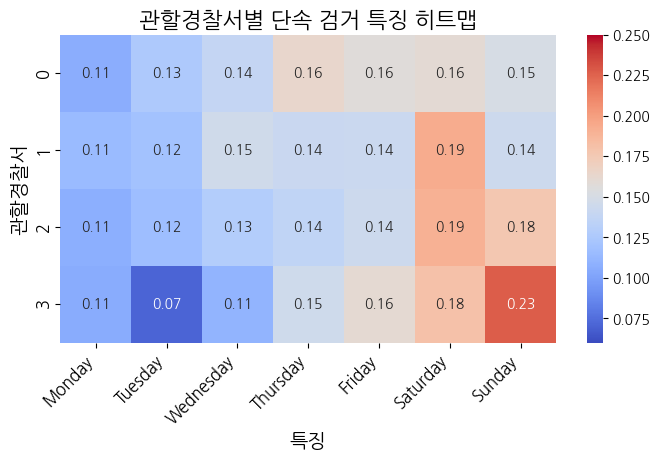

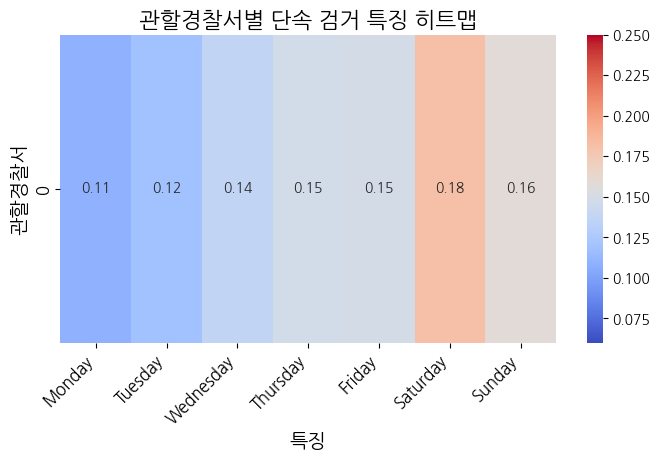

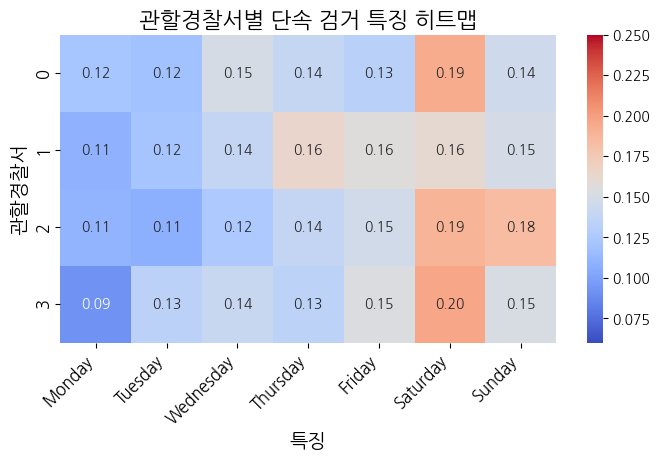

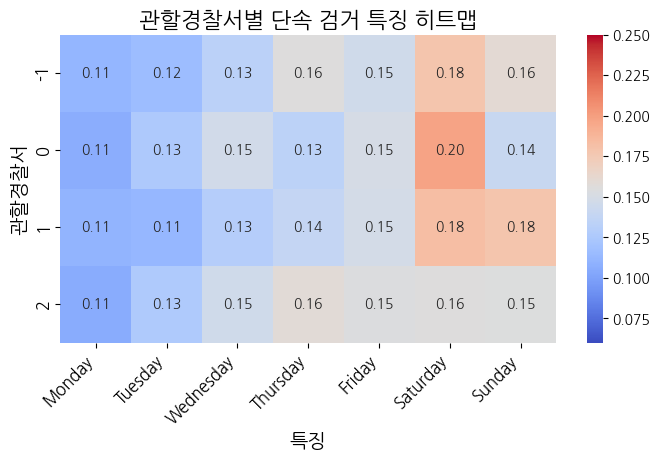

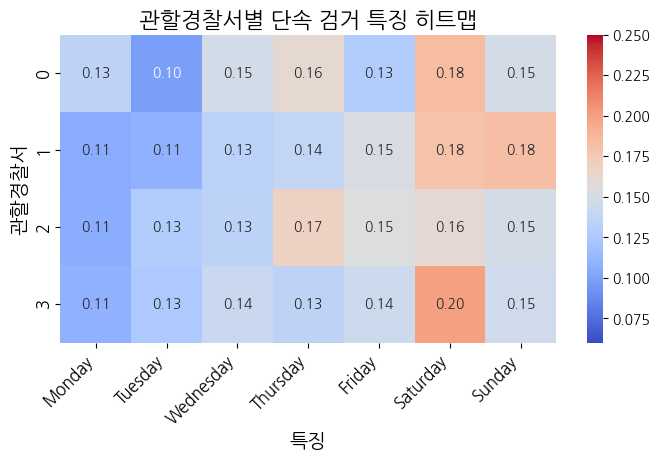

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히트맵 시각화
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_means1[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']],
            annot=True, cmap='coolwarm', fmt='.2f', vmin=0.06, vmax=0.25)
plt.title('관할경찰서별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('관할경찰서', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 히트맵 시각화
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_means2[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']],
            annot=True, cmap='coolwarm', fmt='.2f', vmin=0.06, vmax=0.25)
plt.title('관할경찰서별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('관할경찰서', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 히트맵 시각화
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_means3[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']],
            annot=True, cmap='coolwarm', fmt='.2f', vmin=0.06, vmax=0.25)
plt.title('관할경찰서별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('관할경찰서', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 히트맵 시각화
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_means4[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']],
            annot=True, cmap='coolwarm', fmt='.2f', vmin=0.06, vmax=0.25)
plt.title('관할경찰서별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('관할경찰서', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 히트맵 시각화
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_means5[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']],
            annot=True, cmap='coolwarm', fmt='.2f', vmin=0.06, vmax=0.25)
plt.title('관할경찰서별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('관할경찰서', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
import pandas as pd

# 클러스터 결과 데이터 준비
clusters = {
    'KMeans_0': ['강서구', '서초구', '성동구', '성북구', '송파구', '영등포구', '은평구', '중구'],
    'KMeans_1': ['강남구', '강동구', '구로구', '동대문구', '동작구', '서대문구', '양천구', '종로구', '중랑구'],
    'KMeans_2': ['강북구', '관악구', '광진구', '금천구', '노원구', '마포구', '용산구'],
    'KMeans_3': ['도봉구'],
    'Autoencoder_0': ['구로구', '서초구', '성북구', '송파구', '영등포구', '종로구', '중랑구'],
    'Autoencoder_1': ['금천구', '노원구', '도봉구', '마포구', '서대문구', '양천구', '용산구'],
    'Autoencoder_2': ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '동대문구', '동작구', '성동구'],
    'Autoencoder_3': ['은평구', '중구'],
    'tSNE_0': ['강동구', '구로구', '동대문구', '동작구', '중랑구'],
    'tSNE_1': ['강서구', '서초구', '성동구', '성북구', '송파구', '영등포구', '은평구', '종로구', '중구'],
    'tSNE_2': ['강북구', '관악구', '광진구', '노원구', '도봉구', '마포구', '용산구'],
    'tSNE_3': ['강남구', '금천구', '서대문구', '양천구'],
    'DBSCAN_-1': ['강서구', '구로구', '금천구', '노원구', '도봉구', '성동구', '영등포구', '은평구', '종로구', '중구', '중랑구'],
    'DBSCAN_0': ['강남구', '강동구', '동대문구', '동작구', '서대문구', '양천구'],
    'DBSCAN_1': ['강북구', '관악구', '광진구', '마포구', '용산구'],
    'DBSCAN_2': ['서초구', '성북구', '송파구'],
    'GMM_0': ['구로구', '종로구'],
    'GMM_1': ['강북구', '관악구', '광진구', '금천구', '도봉구', '마포구', '성동구', '용산구'],
    'GMM_2': ['강서구', '서초구', '성북구', '송파구', '영등포구', '은평구', '중구'],
    'GMM_3': ['강남구', '강동구', '노원구', '동대문구', '동작구', '서대문구', '양천구', '중랑구']
}

# 데이터프레임 생성
clustered_df = pd.DataFrame.from_dict(clusters, orient='index').transpose()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 데이터를 리스트 형식으로 변환
transactions = []
for col in clustered_df:
    transactions.append(clustered_df[col].dropna().tolist())

# 연관 분석을 위한 이진 매트릭스로 변환
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transactions_df = pd.DataFrame(te_ary, columns=te.columns_)

# 빈발 항목 집합 찾기
frequent_itemsets = apriori(transactions_df, min_support=0.1, use_colnames=True)

# 연관 규칙 도출
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# 결과 출력
print("연관 규칙:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


연관 규칙:
      antecedents                           consequents  support  confidence  \
0           (강동구)                                 (강남구)      0.2         0.8   
1           (강남구)                                 (강동구)      0.2         0.8   
2           (강남구)                                (동대문구)      0.2         0.8   
3          (동대문구)                                 (강남구)      0.2         0.8   
4           (동작구)                                 (강남구)      0.2         0.8   
...           ...                                   ...      ...         ...   
10309        (중구)  (송파구, 강서구, 은평구, 영등포구, 서초구, 성북구, 성동구)      0.1         0.4   
10310      (영등포구)    (송파구, 강서구, 은평구, 중구, 서초구, 성북구, 성동구)      0.1         0.4   
10311       (서초구)   (송파구, 강서구, 은평구, 중구, 영등포구, 성북구, 성동구)      0.1         0.4   
10312       (성북구)   (송파구, 강서구, 은평구, 중구, 영등포구, 서초구, 성동구)      0.1         0.4   
10313       (성동구)   (송파구, 강서구, 은평구, 중구, 영등포구, 서초구, 성북구)      0.1         0.4   

           lift  
0      3.20000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 연관 규칙 도출 (이전 단계에서 수행)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# 더 중요한 규칙 필터링
important_rules = rules[(rules['lift'] >= 1.5) & (rules['confidence'] >= 0.7) & (rules['support'] >= 0.1)]

# 결과 출력
print("더 중요한 연관 규칙:")
print(important_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


더 중요한 연관 규칙:
            antecedents                     consequents  support  confidence  \
0                 (강동구)                           (강남구)      0.2         0.8   
1                 (강남구)                           (강동구)      0.2         0.8   
2                 (강남구)                          (동대문구)      0.2         0.8   
3                (동대문구)                           (강남구)      0.2         0.8   
4                 (동작구)                           (강남구)      0.2         0.8   
...                 ...                             ...      ...         ...   
10276  (성북구, 영등포구, 성동구)        (송파구, 강서구, 은평구, 중구, 서초구)      0.1         1.0   
10277   (성북구, 성동구, 서초구)       (송파구, 강서구, 은평구, 중구, 영등포구)      0.1         1.0   
10284        (송파구, 성동구)  (강서구, 은평구, 중구, 영등포구, 서초구, 성북구)      0.1         1.0   
10304        (성동구, 서초구)  (송파구, 강서구, 은평구, 중구, 영등포구, 성북구)      0.1         1.0   
10305        (성북구, 성동구)  (송파구, 강서구, 은평구, 중구, 영등포구, 서초구)      0.1         1.0   

           lift  
0      3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 연관 규칙 도출 (이전 단계에서 수행)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# `lift` 값 기준으로 내림차순 정렬
sorted_rules = rules.sort_values(by='lift', ascending=False)

# 상위 20개 연관 규칙 출력 (필요에 따라 수 조정 가능)
top_rules = sorted_rules.head(20)

# 결과 출력
print("상위 20개 연관 규칙:")
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


상위 20개 연관 규칙:
                antecedents                 consequents  support  confidence  \
9023       (양천구, 강남구, 동대문구)       (동작구, 강동구, 서대문구, 중랑구)     0.10    0.666667   
6369         (은평구, 성북구, 중구)                  (송파구, 성동구)     0.10    0.666667   
2420             (송파구, 강서구)                  (성북구, 은평구)     0.15    1.000000   
8691  (은평구, 영등포구, 성동구, 서초구)                   (성북구, 중구)     0.10    1.000000   
2422             (송파구, 은평구)                  (강서구, 성북구)     0.15    1.000000   
2423             (강서구, 성북구)                  (송파구, 은평구)     0.15    1.000000   
6318             (은평구, 성북구)            (송파구, 영등포구, 성동구)     0.10    0.666667   
2425             (성북구, 은평구)                  (송파구, 강서구)     0.15    1.000000   
6316             (송파구, 성동구)            (은평구, 영등포구, 성북구)     0.10    1.000000   
9159             (강서구, 성북구)  (송파구, 은평구, 영등포구, 서초구, 성동구)     0.10    0.666667   
6313             (송파구, 은평구)            (성북구, 영등포구, 성동구)     0.10    0.666667   
6312       (성북구, 영등포구, 성동구

In [ ]:
top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
9023,"(양천구, 강남구, 동대문구)","(동작구, 강동구, 서대문구, 중랑구)",0.10,0.666667,6.666667
6369,"(은평구, 성북구, 중구)","(송파구, 성동구)",0.10,0.666667,6.666667
2420,"(송파구, 강서구)","(성북구, 은평구)",0.15,1.000000,6.666667
8691,"(은평구, 영등포구, 성동구, 서초구)","(성북구, 중구)",0.10,1.000000,6.666667
2422,"(송파구, 은평구)","(강서구, 성북구)",0.15,1.000000,6.666667
2423,"(강서구, 성북구)","(송파구, 은평구)",0.15,1.000000,6.666667
6318,"(은평구, 성북구)","(송파구, 영등포구, 성동구)",0.10,0.666667,6.666667
2425,"(성북구, 은평구)","(송파구, 강서구)",0.15,1.000000,6.666667
6316,"(송파구, 성동구)","(은평구, 영등포구, 성북구)",0.10,1.000000,6.666667
9159,"(강서구, 성북구)","(송파구, 은평구, 영등포구, 서초구, 성동구)",0.10,0.666667,6.666667


##3.월별(4개)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



월별클러스터 0:
['강북구', '용산구', '광진구', '송파구', '성북구', '성동구', '동작구']

월별클러스터 1:
['강남구', '종로구', '은평구', '영등포구', '서초구', '마포구', '관악구', '강서구', '중랑구']

월별클러스터 2:
['동대문구', '노원구', '금천구', '양천구', '구로구', '강동구']

월별클러스터 3:
['서대문구', '도봉구', '중구']

              1월        2월        3월        4월        5월        6월        7월  \
월별클러스터                                                                         
0       0.052746  0.058688  0.065409  0.072405  0.099215  0.093562  0.105553   
1       0.069913  0.051784  0.062901  0.098197  0.095334  0.091915  0.094389   
2       0.086604  0.061051  0.080873  0.072228  0.077171  0.097835  0.091664   
3       0.065363  0.065504  0.078362  0.102002  0.078905  0.104214  0.121109   

              8월        9월       10월       11월       12월  
월별클러스터                                                    
0       0.088441  0.105317  0.107767  0.068783  0.082115  
1       0.087620  0.095621  0.090894  0.078294  0.083137  
2       0.086087  0.087323  0.086711  0.075585  0.096867 

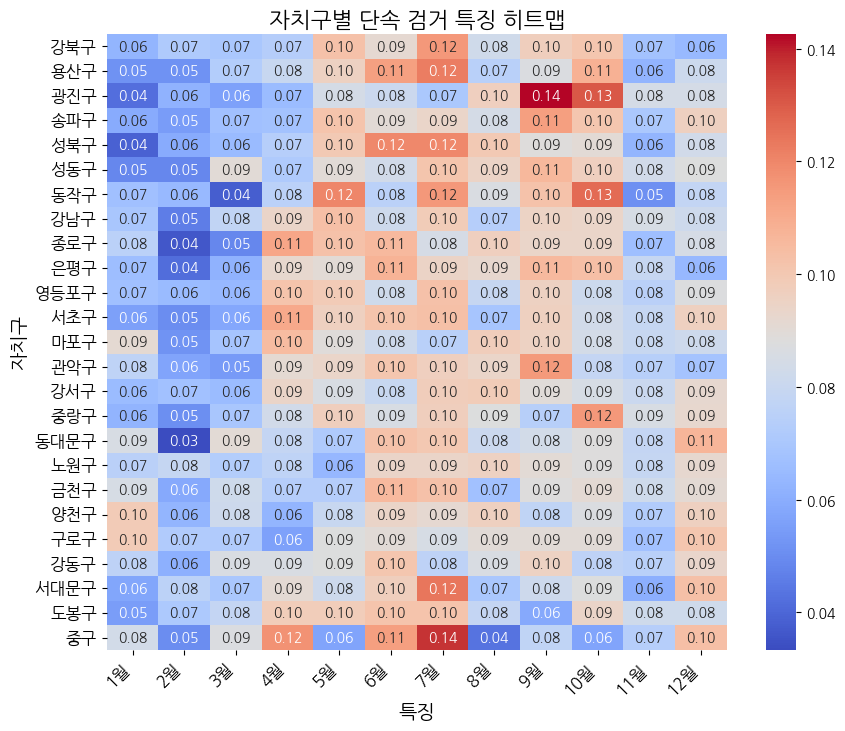

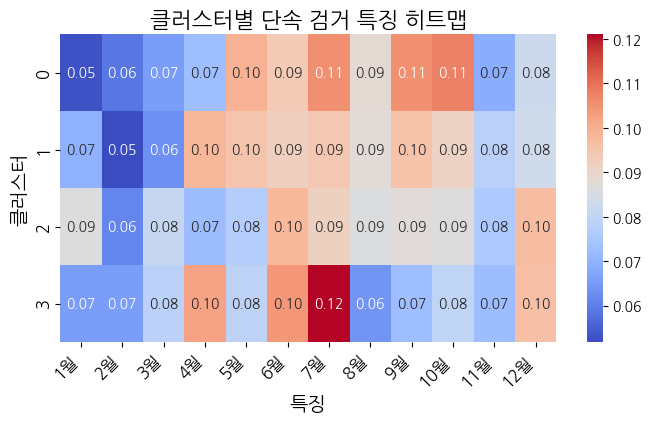

In [ ]:
# 클러스터 변수 설정
columns=['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
cluster_name='월별클러스터'

# K-means 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled2[columns])

# 클러스터 결과를 데이터프레임에 추가
scaled2[cluster_name] = clusters

# 클러스터 번호로 정렬
caught_proc_sorted = scaled2.sort_values(by=cluster_name)

# 출력코드
# 각 클러스터에 포함된 자치구 출력
for cluster in sorted(caught_proc_sorted[cluster_name].unique()):
    print()
    print(f"{cluster_name} {cluster}:")
    print(caught_proc_sorted[caught_proc_sorted[cluster_name] == cluster].index.tolist())


# 각 클러스터의 값들의 평균 계산
cluster_means = scaled2.groupby(cluster_name).mean()

# 출력코드
# 각 클러스터 평균 계산 출력
print()
print(cluster_means[columns])

# 히트맵 시각화에 포함할 컬럼 설정
caught_proc_for_heatmap = caught_proc_sorted[columns]

# 히트맵 시각화
# 자치구 전체
plt.figure(figsize=(10, 8))
sns.heatmap(caught_proc_for_heatmap, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('자치구별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('자치구', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 히트맵 시각화
# 클러스터별
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_means[columns], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('클러스터별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('클러스터', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# 실루엣 계수 계산
silhouette_avg = silhouette_score(scaled2[columns], scaled2[cluster_name])
print(f'Silhouette Score: {silhouette_avg}')

# Davies-Bouldin Index 계산
davies_bouldin = davies_bouldin_score(scaled2[columns], scaled2[cluster_name])
print(f'Davies-Bouldin Index: {davies_bouldin}')

# Calinski-Harabasz Index 계산
calinski_harabasz = calinski_harabasz_score(scaled2[columns], scaled2[cluster_name])
print(f'Calinski-Harabasz Index: {calinski_harabasz}')

# f통계량과 p-value 계산
f_statistic, p_value = f_oneway(
    *[scaled2[scaled2[cluster_name] == cluster][columns].values.flatten() for cluster in scaled2[cluster_name].unique()]
)
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

Silhouette Score: 0.14841532588211745
Davies-Bouldin Index: 1.571011400748267
Calinski-Harabasz Index: 4.991218655557787
F-statistic: 5.406467420206253e-32
P-value: 1.0


##4.연령별(4개)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



연령별클러스터 0:
['강동구', '구로구', '영등포구']

연령별클러스터 1:
['마포구', '강북구', '관악구', '광진구', '성동구', '동작구', '서대문구']

연령별클러스터 2:
['은평구', '양천구', '성북구', '중랑구', '동대문구', '도봉구', '노원구', '금천구']

연령별클러스터 3:
['서초구', '송파구', '용산구', '강서구', '종로구', '중구', '강남구']

              10대       20대       30대       40대       50대       60대       70대  \
연령별클러스터                                                                         
0        0.012656  0.172746  0.314938  0.258060  0.172940  0.062330  0.006330   
1        0.026396  0.313155  0.272603  0.186215  0.147585  0.046573  0.005913   
2        0.019965  0.207961  0.237577  0.266651  0.197076  0.062026  0.008743   
3        0.016378  0.257034  0.330389  0.224353  0.126072  0.039002  0.005942   

          80대 이상  
연령별클러스터           
0        0.00000  
1        0.00156  
2        0.00000  
3        0.00083  


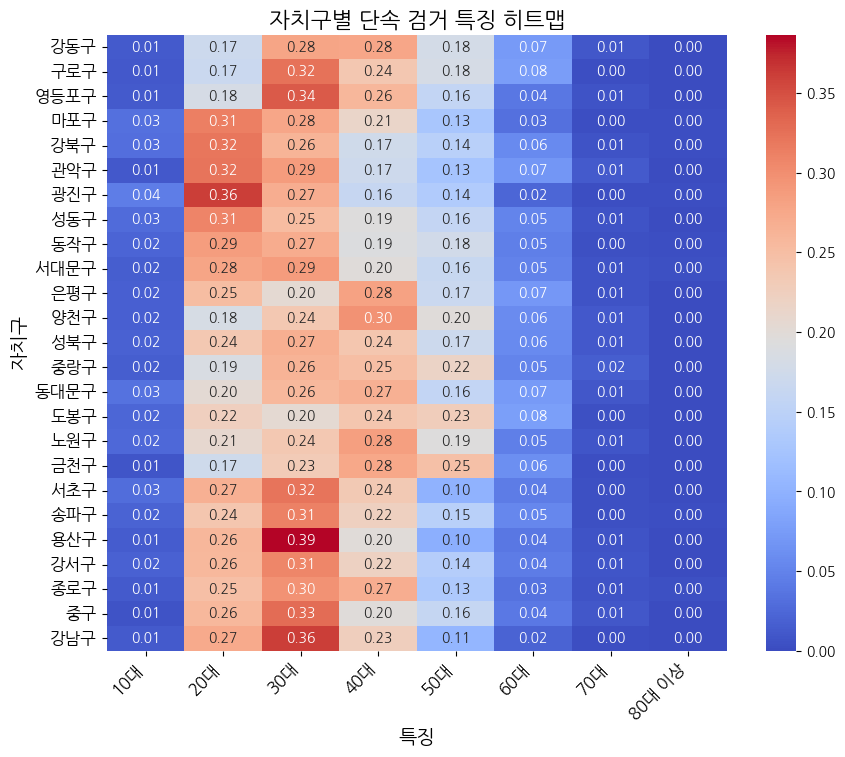

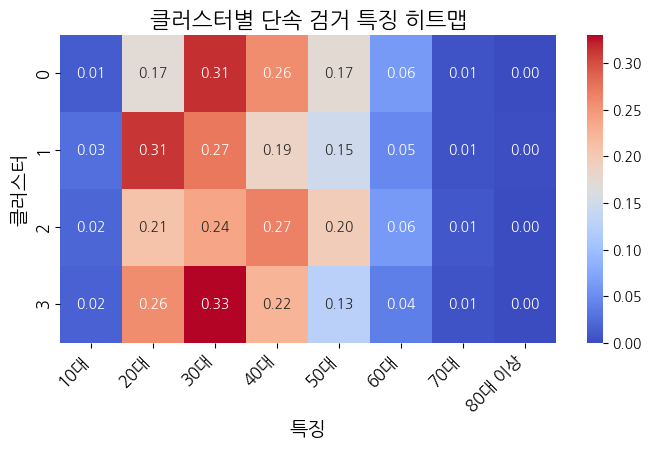

In [ ]:
# 클러스터 변수 설정
columns=['10대', '20대', '30대', '40대', '50대', '60대',   '70대', '80대 이상']
cluster_name='연령별클러스터'

# K-means 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled2[columns])

# 클러스터 결과를 데이터프레임에 추가
scaled2[cluster_name] = clusters

# 클러스터 번호로 정렬
caught_proc_sorted = scaled2.sort_values(by=cluster_name)

# 출력코드
# 각 클러스터에 포함된 자치구 출력
for cluster in sorted(caught_proc_sorted[cluster_name].unique()):
    print()
    print(f"{cluster_name} {cluster}:")
    print(caught_proc_sorted[caught_proc_sorted[cluster_name] == cluster].index.tolist())


# 각 클러스터의 값들의 평균 계산
cluster_means = scaled2.groupby(cluster_name).mean()

# 출력코드
# 각 클러스터 평균 계산 출력
print()
print(cluster_means[columns])

# 히트맵 시각화에 포함할 컬럼 설정
caught_proc_for_heatmap = caught_proc_sorted[columns]

# 히트맵 시각화
# 자치구 전체
plt.figure(figsize=(10, 8))
sns.heatmap(caught_proc_for_heatmap, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('자치구별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('자치구', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 히트맵 시각화
# 클러스터별
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_means[columns], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('클러스터별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('클러스터', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##5.시간대별 (3개)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



시간별클러스터 0:
['강남구', '은평구', '용산구', '성동구', '서초구', '서대문구', '동작구', '동대문구', '마포구', '광진구', '관악구', '노원구']

시간별클러스터 1:
['도봉구', '금천구', '구로구', '양천구', '중랑구']

시간별클러스터 2:
['중구', '강서구', '성북구', '송파구', '영등포구', '강북구', '강동구', '종로구']

         Late Night  Early Morning   Morning  Afternoon   Evening     Night
시간별클러스터                                                                    
0          0.395834       0.144002  0.066896   0.028610  0.059976  0.304682
1          0.322586       0.168737  0.051908   0.042233  0.086511  0.328025
2          0.352106       0.120611  0.051675   0.032370  0.050887  0.392352


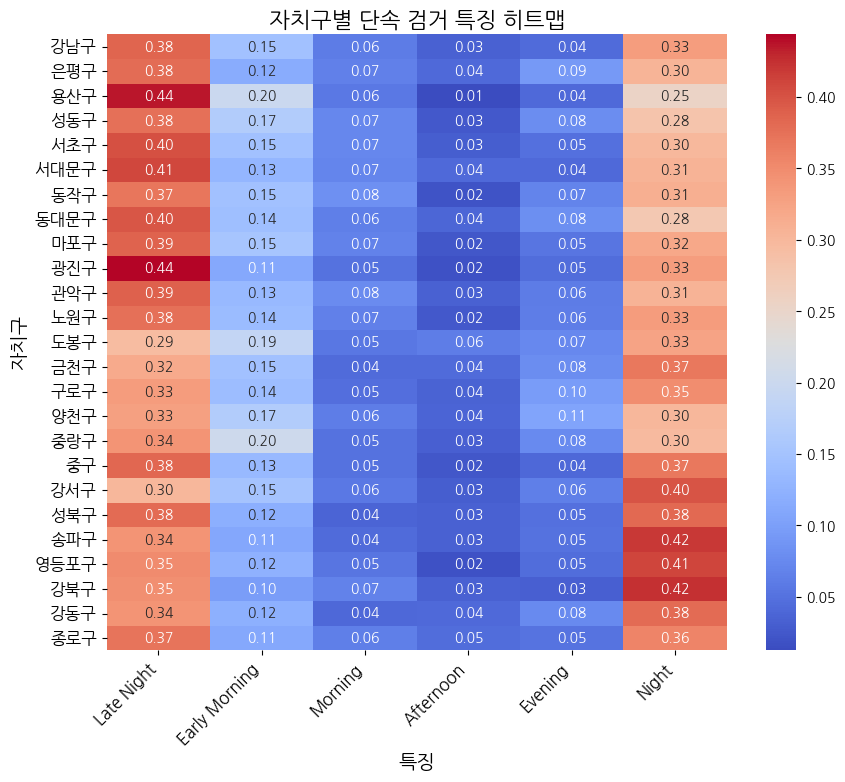

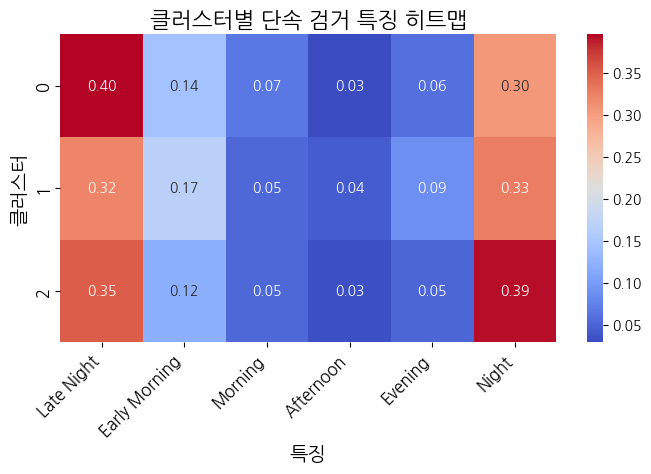

In [ ]:
# 클러스터 변수 설정
columns=['Late Night', 'Early Morning', 'Morning', 'Afternoon',  'Evening', 'Night']
cluster_name='시간별클러스터'

# K-means 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled2[columns])

# 클러스터 결과를 데이터프레임에 추가
scaled2[cluster_name] = clusters

# 클러스터 번호로 정렬
caught_proc_sorted = scaled2.sort_values(by=cluster_name)

# 출력코드
# 각 클러스터에 포함된 자치구 출력
for cluster in sorted(caught_proc_sorted[cluster_name].unique()):
    print()
    print(f"{cluster_name} {cluster}:")
    print(caught_proc_sorted[caught_proc_sorted[cluster_name] == cluster].index.tolist())


# 각 클러스터의 값들의 평균 계산
cluster_means = scaled2.groupby(cluster_name).mean()

# 출력코드
# 각 클러스터 평균 계산 출력
print()
print(cluster_means[columns])

# 히트맵 시각화에 포함할 컬럼 설정
caught_proc_for_heatmap = caught_proc_sorted[columns]

# 히트맵 시각화
# 자치구 전체
plt.figure(figsize=(10, 8))
sns.heatmap(caught_proc_for_heatmap, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('자치구별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('자치구', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 히트맵 시각화
# 클러스터별
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_means[columns], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('클러스터별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('클러스터', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##1.성별(변수1개)

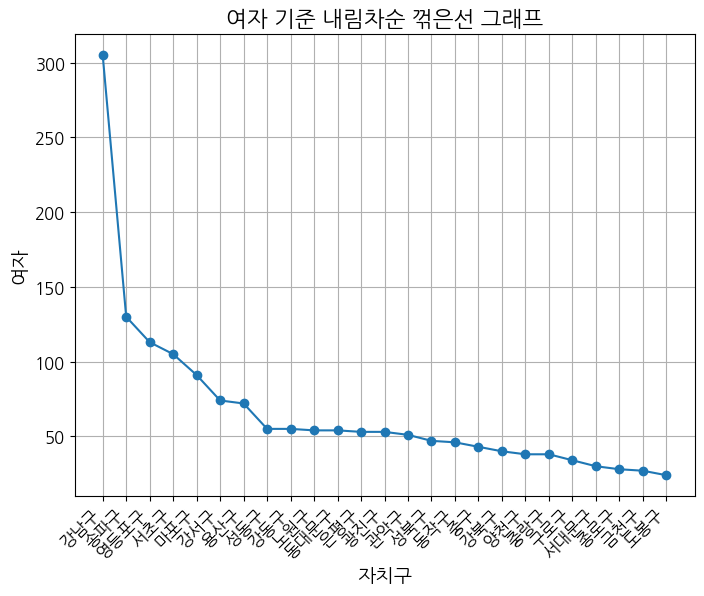

In [ ]:
# scaled2 데이터프레임을 열 기준으로 내림차순 정렬
df1_sorted = scaled2.sort_values(by='여자', ascending=False)

# 꺾은선 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(df1_sorted['여자'], marker='o', linestyle='-')
plt.title('여자 기준 내림차순 꺾은선 그래프', fontsize=16)
plt.xlabel('자치구', fontsize=14)
plt.ylabel('여자', fontsize=14)
plt.xticks(ticks=range(len(df1_sorted)), labels=df1_sorted.index, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

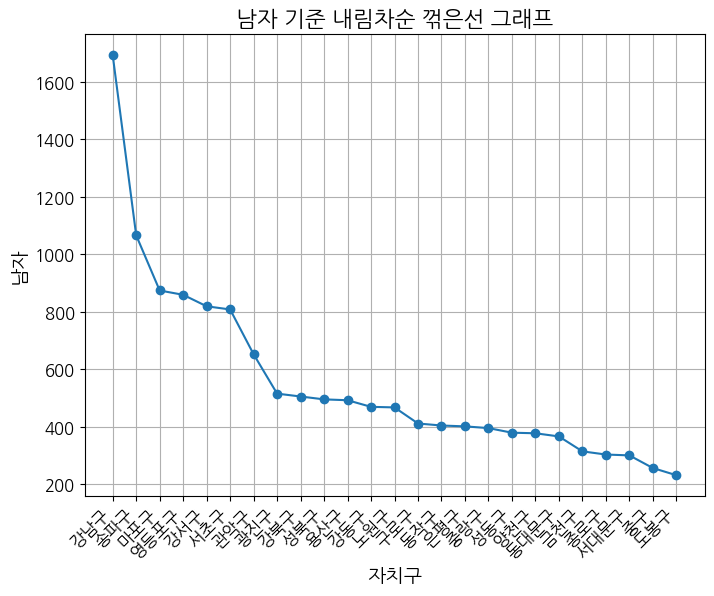

In [ ]:
# scaled2 데이터프레임을 열 기준으로 내림차순 정렬
df1_sorted = scaled2.sort_values(by='남자', ascending=False)

# 꺾은선 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(df1_sorted['남자'], marker='o', linestyle='-')
plt.title('남자 기준 내림차순 꺾은선 그래프', fontsize=16)
plt.xlabel('자치구', fontsize=14)
plt.ylabel('남자', fontsize=14)
plt.xticks(ticks=range(len(df1_sorted)), labels=df1_sorted.index, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

##6.알콜농도별 (변수1개)

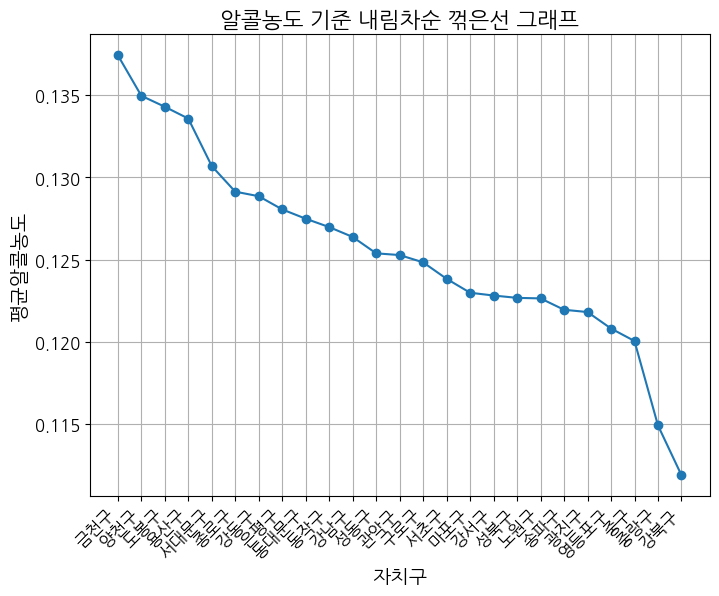

In [ ]:
# scaled2 데이터프레임을 열 기준으로 내림차순 정렬
df1_sorted = scaled2.sort_values(by='평균알콜농도', ascending=False)

# 꺾은선 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(df1_sorted['평균알콜농도'], marker='o', linestyle='-')
plt.title('알콜농도 기준 내림차순 꺾은선 그래프', fontsize=16)
plt.xlabel('자치구', fontsize=14)
plt.ylabel('평균알콜농도', fontsize=14)
plt.xticks(ticks=range(len(df1_sorted)), labels=df1_sorted.index, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

##7.적발횟수별 (변수1개)

In [ ]:
df1_sorted.columns

Index(['남자', '여자', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월',
       '9월', '10월', '11월', '12월', '10대', '20대', '30대', '40대', '50대', '60대',
       '70대', '80대 이상', 'Afternoon', 'Early Morning', 'Evening', 'Late Night',
       'Morning', 'Night', '평균알콜농도', '총적발횟수'],
      dtype='object')

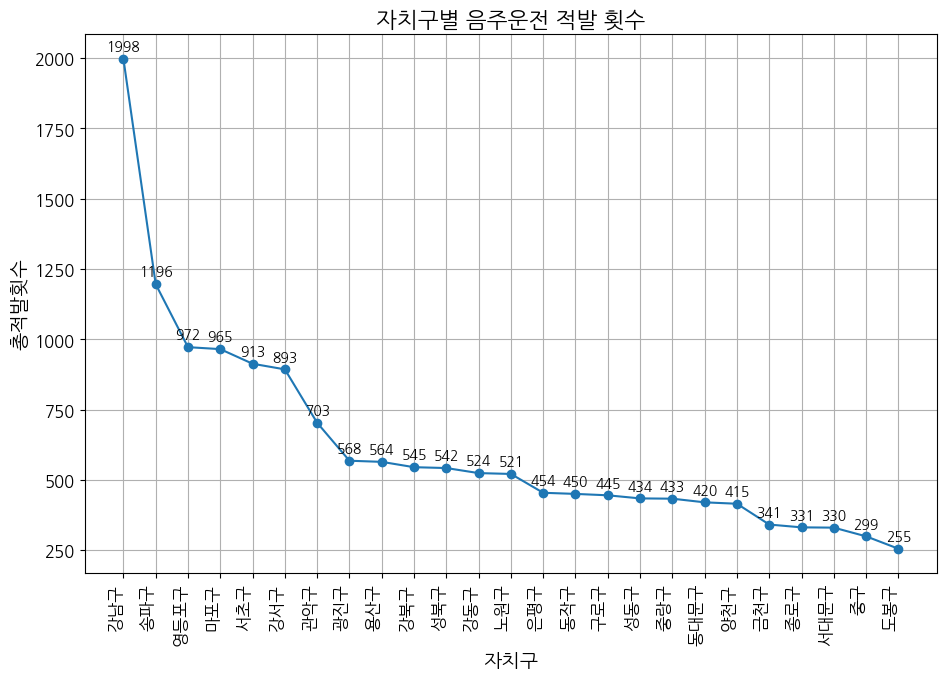

In [ ]:
# scaled2 데이터프레임을 열 기준으로 내림차순 정렬
df1_sorted = caught_proc.sort_values(by='총적발횟수', ascending=False)

# 꺾은선 그래프 그리기
plt.figure(figsize=(11, 7))
plt.plot( df1_sorted['총적발횟수'], marker='o', linestyle='-')
# 그래프 위에 총적발횟수 값 표시
for i, value in enumerate(df1_sorted['총적발횟수']):
    plt.text(i,  value + 0.01 * max(df1_sorted['총적발횟수']), str(value), ha='center', va='bottom')


plt.title('자치구별 음주운전 적발 횟수', fontsize=16)
plt.xlabel('자치구', fontsize=14)
plt.ylabel('총적발횟수', fontsize=14)

plt.xticks(ticks=range(len(df1_sorted)), labels=df1_sorted.index, rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)
plt.show()

In [ ]:
caught_proc['총적발횟수']


# 6.전체 데이터 탐색

In [ ]:
scaled2.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['남자', '여자', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월',
       '9월', '10월', '11월', '12월', '10대', '20대', '30대', '40대', '50대', '60대',
       '70대', '80대 이상', 'Afternoon', 'Early Morning', 'Evening', 'Late Night',
       'Morning', 'Night', '평균알콜농도', '총적발횟수', '요일별클러스터', 'Autoencoder_클러스터',
       'tSNE_클러스터', 'DBSCAN_클러스터', 'GMM_클러스터', '월별클러스터', '연령별클러스터', '시간별클러스터'],
      dtype='object')

In [ ]:
df_total = scaled2[['요일별클러스터', '월별클러스터','시간별클러스터', '연령별클러스터']]
df_total.rename(columns={'남자':'남자비율'},inplace=True)
df_total

<ipython-input-39-9ac6c7ef8e5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total.rename(columns={'남자':'남자비율'},inplace=True)


,요일별클러스터,월별클러스터,시간별클러스터,연령별클러스터
자치구,,,,
강남구,1,1,0,3
강동구,1,2,2,0
강북구,2,0,2,1
강서구,0,1,2,3
관악구,2,1,0,1
광진구,2,0,0,1
구로구,1,2,1,0
금천구,2,2,1,2
노원구,2,2,0,2


In [ ]:
# 맵핑정의
mapping1 = {0: '목금토', 1: '토', 2: '주말', 3: '일'}
mapping2 = {0: '수목토', 1: '주말', 2: '목금토', 3: '토'}
mapping3 = {0: '7,9,10월', 1: '4,5,9월', 2: '6,12월', 3: '4,6,7,12월'}
mapping4 = {0: '30-40대', 1: '20-30대', 2: '40대', 3: '30대'}
mapping5 = {0: '0-4시', 1: '20-4시', 2: '20-24시'}

# 열 'B'의 값을 매핑을 통해 변환
df_total['요일별클러스터'] = df_total['요일별클러스터'].map(mapping1)
# df_total['GMM_클러스터'] = df_total['GMM_클러스터'].map(mapping2)
df_total['월별클러스터'] = df_total['월별클러스터'].map(mapping3)
df_total['연령별클러스터'] = df_total['연령별클러스터'].map(mapping4)
df_total['시간별클러스터'] = df_total['시간별클러스터'].map(mapping5)

In [ ]:
df_total

,요일별클러스터,월별클러스터,시간별클러스터,연령별클러스터
자치구,,,,
강남구,토,"4,5,9월",0-4시,30대
강동구,토,"6,12월",20-24시,30-40대
강북구,주말,"7,9,10월",20-24시,20-30대
강서구,목금토,"4,5,9월",20-24시,30대
관악구,주말,"4,5,9월",0-4시,20-30대
광진구,주말,"7,9,10월",0-4시,20-30대
구로구,토,"6,12월",20-4시,30-40대
금천구,주말,"6,12월",20-4시,40대
노원구,주말,"6,12월",0-4시,40대
